# 02 - Análisis de Resultados de Modelos

**Objetivo:** Analizar y comparar los resultados de los modelos de clasificación y regresión generados por los pipelines de Kedro.

## 1. Carga del Contexto y Catálogo de Kedro

In [14]:
%load_ext kedro.ipython
%reload_kedro

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[11/01/25 08:09:29] INFO     Resolved project path as:                                              ]8;id=483943;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=955052;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosis                
                             tema_Dev.                                                                             
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=523897;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=685405;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/01/25 08:09:30] INFO     Kedro project ML_Analisis_Ecosistema_Dev                               ]8;id=712792;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=693905;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=281440;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=633676;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=106236;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=916181;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

### ¿Qué acaba de pasar? Explicación del Contexto de Kedro

La celda anterior ejecuta dos "comandos mágicos" específicos de Kedro para notebooks:

1.  `%load_ext kedro.ipython`: Carga una extensión especial de Kedro que nos permite usar comandos de Kedro dentro del notebook.
2.  `%reload_kedro`: Este es el comando importante. Busca la raíz de nuestro proyecto Kedro, inicia una sesión y carga en la memoria del notebook varios objetos clave.

El texto que aparece como salida nos confirma que todo ha ido bien y nos informa de las **variables globales** que ha creado para nosotros:

*   `catalog`: Este es el más importante para nosotros ahora. Es una copia del **Catálogo de Datos** (`conf/base/catalog.yml`). A través de él, podemos cargar y guardar cualquier dataset definido en el proyecto con un simple `catalog.load("nombre_del_dataset")`.
*   `context`: Es el "corazón" del proyecto Kedro. Contiene toda la configuración, parámetros, etc.
*   `pipelines`: Un diccionario que contiene todos los pipelines definidos en el proyecto.
*   `session`: La sesión de Kedro activa, que gestiona la ejecución.

En resumen, esa celda ha "conectado" nuestro notebook con el proyecto Kedro, dándonos acceso a todos sus componentes de forma programática.

In [15]:
# Cargar las métricas del modelo de regresión
metrics_regresion = catalog.load("metrics")

# Cargar las métricas del modelo de clasificación
metrics_clasificacion = catalog.load("metrics_clf")

# Cargar las matrices de confusión
matrices_confusion = catalog.load("classification_confusion_matrices")

# Cargar los modelos (opcional, si queremos inspeccionarlos)
modelo_regresion = catalog.load("regresion_model")
modelo_clasificacion = catalog.load("clasificacion_model")

print("--- Métricas de Regresión ---")
print(metrics_regresion)
print("\n--- Métricas de Clasificación ---")
print(metrics_clasificacion)


[11/01/25 08:14:21] INFO     Loading data from metrics (JSONDataset)...                         ]8;id=261809;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=927775;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\

                    INFO     Loading data from metrics_clf (JSONDataset)...                     ]8;id=878881;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=427270;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\

                    INFO     Loading data from classification_confusion_matrices                ]8;id=843854;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=99369;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\
                             (JSONDataset)...                                                                      

                    INFO     Loading data from regresion_model (PickleDataset)...               ]8;id=121797;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=502139;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\

                    INFO     Loading data from clasificacion_model (PickleDataset)...           ]8;id=555575;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=316602;file://c:\Users\hdagu\Documents\ML_Analisis_Ecosistema_Dev\ML_Analisis_Ecosistema_Dev\.venv\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\

--- Métricas de Regresión ---
{'LinearRegression_model': {'rmse': 953282147036.3721, 'mae': 14083751758.430809, 'r2': -330911706300436.1}, 'Ridge_model': {'rmse': 33156.160515996846, 'mae': 24232.30746292661, 'r2': 0.5996888575837898}, 'Lasso_model': {'rmse': 33164.096700891765, 'mae': 24235.336490748625, 'r2': 0.5994971994783094}, 'RandomForestRegressor_model': {'rmse': 15800.2764136324, 'mae': 6181.133402423189, 'r2': 0.9090927372986145}, 'XGBRegressor_model': {'rmse': 18456.879729111097, 'mae': 9704.942054278516, 'r2': 0.875953139815924}}

--- Métricas de Clasificación ---
{'LogisticRegression_classifier': {'accuracy': 0.8390265196987886, 'f1_score': 0.7280103263876083, 'precision': 0.7586471944657955, 'recall': 0.6997518610421837, 'roc_auc': 0.8973848655693195}, 'RandomForestClassifier_classifier': {'accuracy': 0.9252428244024883, 'f1_score': 0.8723681758896963, 'precision': 0.9194815396700707, 'recall': 0.8298475717830557, 'roc_auc': 0.9791738002285199}, 'XGBClassifier_classifier'

### 2. Cargar los Artefactos de los Pipelines

Ahora que tenemos acceso al `catalog`, lo usamos para cargar todos los "artefactos" (resultados) que fueron generados y guardados por nuestros pipelines de `regresion` y `clasificacion`.

Cada línea de código `catalog.load("...")` busca en el archivo `conf/base/catalog.yml` el dataset con ese nombre y lo carga en una variable de Python:

*   `catalog.load("metrics")`: Carga el archivo `metrics.json` con los resultados del pipeline de regresión.
*   `catalog.load("metrics_clf")`: Carga el archivo `metrics_clf.json` con los resultados del pipeline de clasificación.
*   `catalog.load("classification_confusion_matrices")`: Carga las matrices de confusión.
*   `catalog.load("regresion_model")` y `catalog.load("clasificacion_model")`: Cargan los archivos `.pkl` que contienen los objetos de los modelos entrenados.

**Significado de la Salida:**

La salida de la celda es simplemente la impresión (`print`) de los diccionarios de métricas que acabamos de cargar. Esto nos sirve como una verificación rápida para confirmar que los datos se han cargado correctamente en las variables `metrics_regresion` y `metrics_clasificacion` antes de proceder a analizarlos en detalle.

In [3]:
import json
print(json.dumps(metrics_regresion, indent=4))


{
    "LinearRegression_model": {
        "rmse": 953282147036.3721,
        "mae": 14083751758.430809,
        "r2": -330911706300436.1
    },
    "Ridge_model": {
        "rmse": 33156.160515996846,
        "mae": 24232.30746292661,
        "r2": 0.5996888575837898
    },
    "Lasso_model": {
        "rmse": 33164.096700891765,
        "mae": 24235.336490748625,
        "r2": 0.5994971994783094
    },
    "RandomForestRegressor_model": {
        "rmse": 15800.2764136324,
        "mae": 6181.133402423189,
        "r2": 0.9090927372986145
    },
    "XGBRegressor_model": {
        "rmse": 18456.879729111097,
        "mae": 9704.942054278516,
        "r2": 0.875953139815924
    }
}


### Visualización de Métricas con JSON

Esta celda toma la variable `metrics_regresion` (que es un diccionario de Python) y la muestra en un formato más legible.

*   `import json`: Importa la librería estándar de Python para trabajar con el formato JSON.
*   `json.dumps(..., indent=4)`: Esta función, a menudo llamada "pretty-print" (impresión bonita), convierte el diccionario de Python en un texto con formato JSON, usando 4 espacios de indentación.

**Es exactamente la misma información** que se cargó del catálogo, pero en lugar de verla como un diccionario de Python en una sola línea, la vemos estructurada y anidada, lo que facilita enormemente su lectura y comparación.

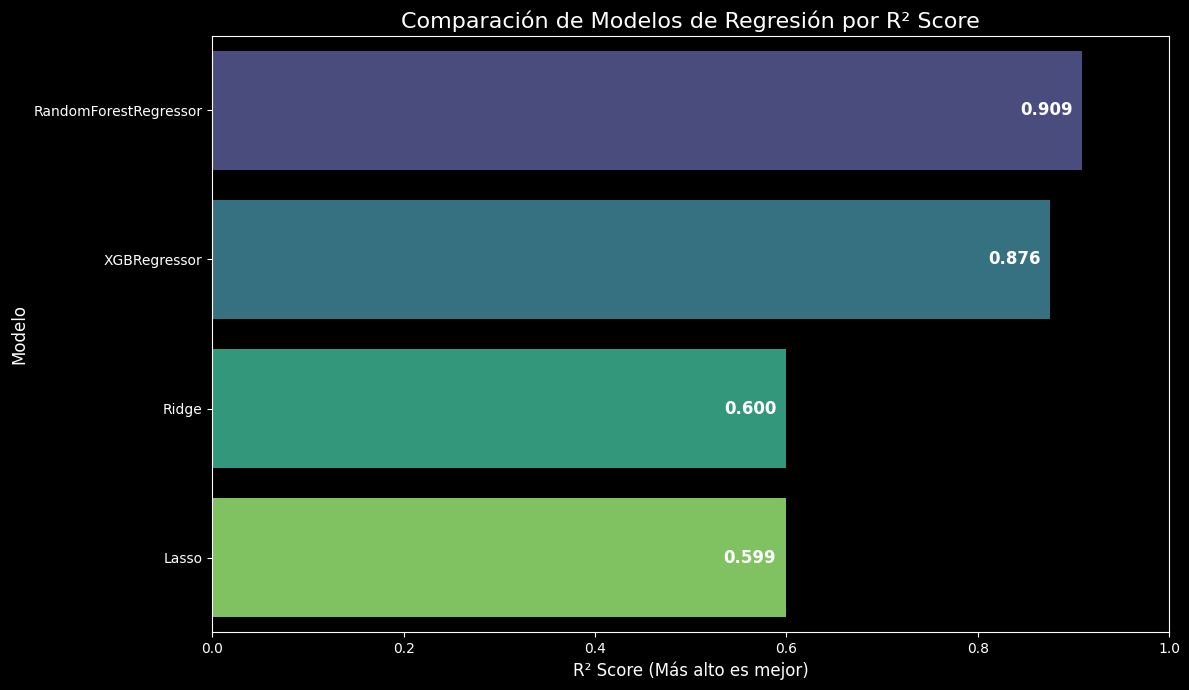

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparar los datos para el gráfico ---
# Extraemos el nombre del modelo y su métrica R2
# Ignoramos LinearRegression porque su valor es tan bajo que distorsionaría el gráfico
r2_scores = {
    model.replace('_model', ''): result['r2'] 
    for model, result in metrics_regresion.items() 
    if 'LinearRegression' not in model
}

# Creamos un DataFrame de pandas para facilitar el ploteo
df_r2 = pd.DataFrame(list(r2_scores.items()), columns=['Modelo', 'R2 Score']).sort_values('R2 Score', ascending=False)

# --- Crear el gráfico ---
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x='R2 Score', y='Modelo', data=df_r2, palette='viridis')

# Añadir el valor exacto en cada barra para mayor claridad
for index, value in enumerate(df_r2['R2 Score']):
    plt.text(value - 0.01, index, f'{value:.3f}', color='white', ha="right", va="center", weight='bold', fontsize=12)

# --- Títulos y etiquetas ---
plt.title('Comparación de Modelos de Regresión por R² Score', fontsize=16)
plt.xlabel('R² Score (Más alto es mejor)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0, 1) # El R2 Score va de 0 a 1
plt.tight_layout()
plt.show()

### Conclusiones del Análisis de Regresión

El gráfico de barras anterior compara el rendimiento de los diferentes modelos de regresión utilizando la métrica **R² Score**.

**Observaciones:**

1.  **Ganador Claro:** El modelo `RandomForestRegressor` es notablemente superior a los demás, con un **R² de 0.909**. Esto indica que es capaz de explicar casi el 91% de la variabilidad en los salarios, lo cual es un resultado excelente.
2.  **Modelos de Boosting:** `XGBRegressor` también muestra un rendimiento muy fuerte con un R² de 0.876, consolidando la idea de que los modelos basados en ensambles de árboles son muy efectivos para este conjunto de datos.
3.  **Modelos Lineales:** Los modelos `Ridge` y `Lasso`, aunque muy superiores a la regresión lineal simple (cuyo R² era masivamente negativo), se quedan en un R² de ~0.60. Esto sugiere que la relación entre las características y el salario no es puramente lineal y que estos modelos no pueden capturar la complejidad de los datos tan bien como los modelos de árboles.

**Conclusión:** Para la tarea de predecir el salario, el `RandomForestRegressor` es la elección recomendada debido a su alto poder predictivo y su bajo error promedio (como vimos en las métricas, un MAE de solo ~$6,181).

In [11]:
import json
print(json.dumps(metrics_clasificacion, indent=4))

{
    "LogisticRegression_classifier": {
        "accuracy": 0.8390265196987886,
        "f1_score": 0.7280103263876083,
        "precision": 0.7586471944657955,
        "recall": 0.6997518610421837,
        "roc_auc": 0.8973848655693195
    },
    "RandomForestClassifier_classifier": {
        "accuracy": 0.9252428244024883,
        "f1_score": 0.8723681758896963,
        "precision": 0.9194815396700707,
        "recall": 0.8298475717830557,
        "roc_auc": 0.9791738002285199
    },
    "XGBClassifier_classifier": {
        "accuracy": 0.9691149186947506,
        "f1_score": 0.9477570611039321,
        "precision": 0.9888289676425269,
        "recall": 0.9099610067352003,
        "roc_auc": 0.9910230586902238
    },
    "LGBMClassifier_classifier": {
        "accuracy": 0.9849394303175816,
        "f1_score": 0.9751351351351352,
        "precision": 0.991572004397215,
        "recall": 0.9592343140730237,
        "roc_auc": 0.9977488966105562
    }
}


### Visualización Pretty-Print

Esta celda toma la variable `metrics_clasificacion` (que es un diccionario de Python) y la muestra en un formato más legible.

**Es exactamente la misma información** que se cargó del catálogo, pero en lugar de verla como un diccionario de Python en una sola línea, la vemos estructurada y anidada, lo que facilita enormemente su lectura y comparación.

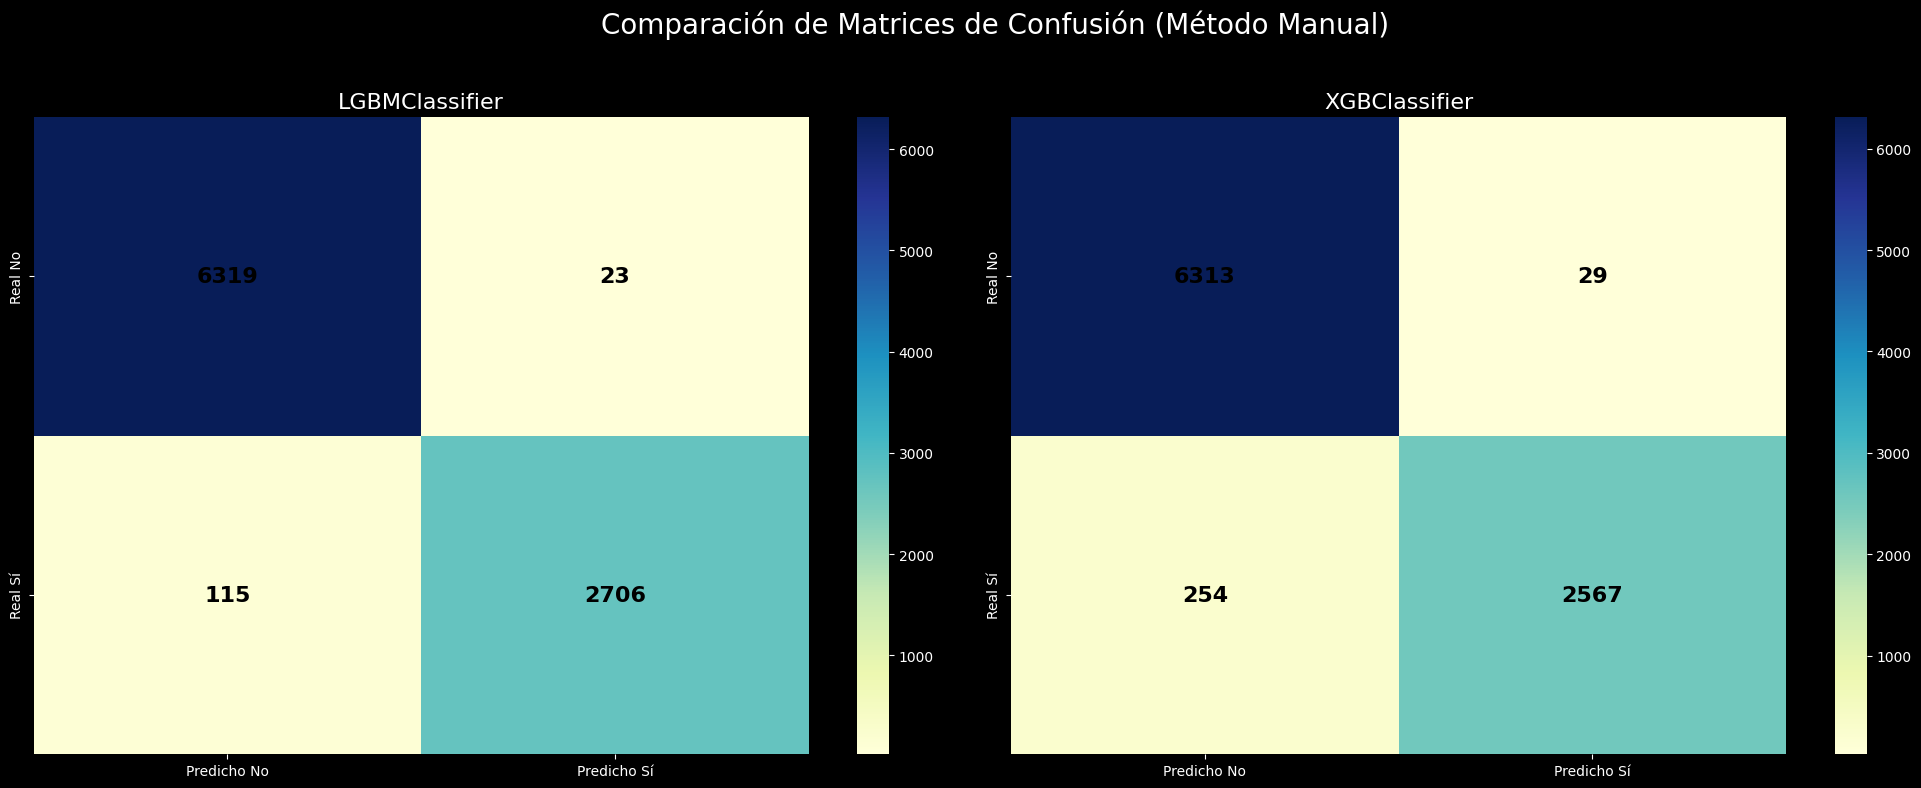

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Crear la figura con dos subplots ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Comparación de Matrices de Confusión (Método Manual)', fontsize=20)

# --- Matriz de Confusión para LGBMClassifier ---
try:
    lgbm_matrix = np.array(matrices_confusion['LGBMClassifier_classifier'])
    # Dibujamos el heatmap SIN anotaciones automáticas
    sns.heatmap(lgbm_matrix, annot=False, fmt='d', cmap='YlGnBu', ax=axes[0],
                xticklabels=['Predicho No', 'Predicho Sí'], 
                yticklabels=['Real No', 'Real Sí'])
    axes[0].set_title('LGBMClassifier', fontsize=16)
    
    # Añadimos los números manualmente, celda por celda
    for i in range(lgbm_matrix.shape[0]):
        for j in range(lgbm_matrix.shape[1]):
            axes[0].text(j + 0.5, i + 0.5, f'{lgbm_matrix[i, j]}',
                         ha='center', va='center', color='black', fontsize=16, weight='bold')
except KeyError:
    axes[0].set_title('LGBMClassifier: Matriz no encontrada', fontsize=14)
    axes[0].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=20)

# --- Matriz de Confusión para XGBClassifier ---
try:
    xgb_matrix = np.array(matrices_confusion['XGBClassifier_classifier'])
    # Dibujamos el heatmap SIN anotaciones automáticas
    sns.heatmap(xgb_matrix, annot=False, fmt='d', cmap='YlGnBu', ax=axes[1],
                xticklabels=['Predicho No', 'Predicho Sí'],
                yticklabels=['Real No', 'Real Sí'])
    axes[1].set_title('XGBClassifier', fontsize=16)

    # Añadimos los números manualmente, celda por celda
    for i in range(xgb_matrix.shape[0]):
        for j in range(xgb_matrix.shape[1]):
            axes[1].text(j + 0.5, i + 0.5, f'{xgb_matrix[i, j]}',
                         ha='center', va='center', color='black', fontsize=16, weight='bold')
except KeyError:
    axes[1].set_title('XGBClassifier: Matriz no encontrada', fontsize=14)
    axes[1].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=20)

# --- Mostrar el gráfico ---
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Análisis Visual de Errores: Matrices de Confusión

Los gráficos anteriores nos permiten "ver" los errores de nuestros dos mejores modelos.

**Observaciones:**

1.  **Rendimiento General:** Ambos modelos son excelentes, ya que los números en la diagonal principal (los aciertos) son mucho más grandes que los de fuera de la diagonal (los errores).
2.  **Tipo de Error:** El punto clave de la comparación está en los **Falsos Negativos** (cuadrado de abajo a la izquierda).
    *   **XGBoost** tiene **254** Falsos Negativos: se le "escapan" 254 casos que eran "Sí" pero que predijo como "No".
    *   **LGBM** tiene solo **115** Falsos Negativos: es mucho más sensible y capaz de encontrar los casos positivos.
3.  **Falsos Positivos:** Ambos modelos son muy precisos y cometen muy pocos Falsos Positivos (23 para LGBM y 29 para XGBoost). Cuando dicen "Sí", es muy probable que sea "Sí".

**Conclusión Final:** La visualización de la matriz de confusión confirma nuestra elección. **LGBMClassifier es el mejor modelo** no solo porque sus métricas generales son más altas, sino porque su patrón de error es más deseable: falla mucho menos a la hora de identificar la clase positiva, que suele ser la de mayor interés.

In [17]:
print(matrices_confusion)

{'LogisticRegression_classifier': [[5714, 628], [847, 1974]], 'RandomForestClassifier_classifier': [[6137, 205], [480, 2341]], 'XGBClassifier_classifier': [[6313, 29], [254, 2567]], 'LGBMClassifier_classifier': [[6319, 23], [115, 2706]]}


#### Verificación de los Datos de las Matrices de Confusión

Antes de visualizar las matrices, es una buena práctica inspeccionar la variable que las contiene.

La celda de código `print(matrices_confusion)` muestra el contenido crudo de la variable. La salida es un **diccionario de Python**, donde:
*   Las **claves** (`keys`) son los nombres de los modelos (ej. `'LGBMClassifier_classifier'`).
*   Los **valores** (`values`) son las matrices de confusión, representadas como una lista de listas (ej. `[[6319, 23], [115, 2706]]`).

Este paso nos sirvió para confirmar que los datos se cargaron correctamente y que teníamos una matriz de 2x2 para cada modelo antes de proceder a la visualización con los mapas de calor.

## Conclusiones del Análisis de Clasificación

Al igual que con la regresión, hemos evaluado varios modelos para la tarea de clasificación. Las métricas clave aquí son el **F1-Score** (un balance entre precisión y recall) y el **ROC AUC** (la capacidad del modelo para distinguir entre clases).

**Observaciones:**

1.  **Ganador Claro:** El modelo `LGBMClassifier` (LightGBM) se destaca como el mejor, con un **F1-Score de 0.975** y un **ROC AUC de 0.998**, ambos valores muy cercanos a la perfección.
2.  **Subcampeón Fuerte:** `XGBClassifier` (XGBoost) le sigue de cerca, demostrando de nuevo la potencia de los algoritmos de Gradient Boosting para datos tabulares como los de esta encuesta.
3.  **Línea Base:** `RandomForestClassifier` ofrece un rendimiento sólido (F1-Score de 0.87), pero no puede competir con los modelos de boosting. `LogisticRegression` sirve como una referencia inicial, mostrando que los modelos más complejos aportan un valor significativo.

**Conclusión:** Para la tarea de clasificación, `LGBMClassifier` es la elección superior. Es el modelo más equilibrado y con mayor poder predictivo.